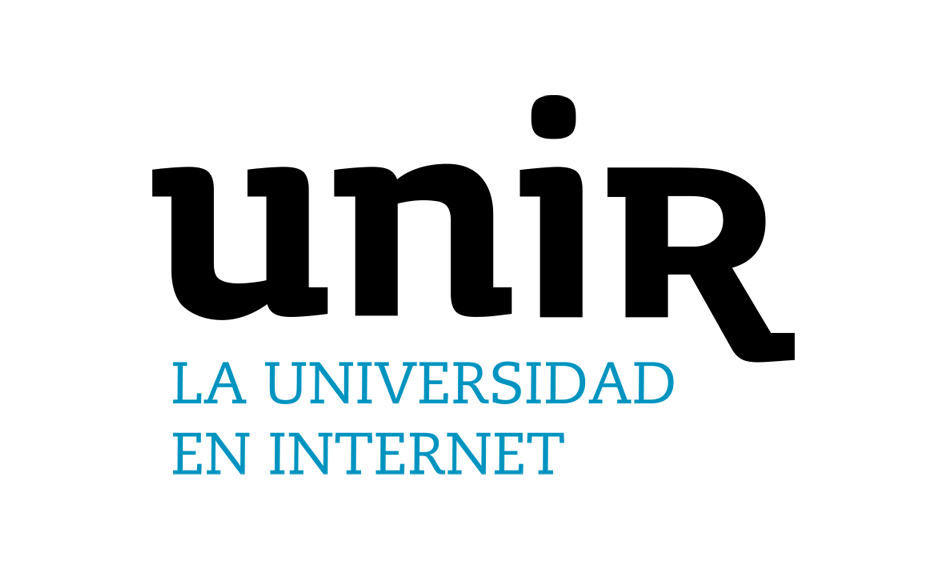
---


# **Máster Universitario en Inteligencia de Negocios**
# Proyecto Transversal

## Importar dataset

In [8]:
import pandas as pd
url = "https://github.com/anapaccasilva/AdventureWorks/blob/main/DataSet%20SQL%20Analisis%20Masivo%20de%20Datos%20(1).xlsx?raw=true"

customersPurchases = pd.read_excel(url ,sheet_name="Var Discreta Adq Bicicleta")

# **EDA - Análisis de Datos Exploratoria**

## 1) Panorama general

In [9]:
customersPurchases.shape

(18484, 19)

In [10]:
customersPurchases.describe()

,TotalAmount,BikePurchase,CustomerID,PersonID,Age,TotalChildren,HomeOwnerFlag,NumberCarsOwned
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,1588.329216,0.494049,20241.500000,11532.731660,58.420039,1.844352,0.676369,1.502705
std,2124.231717,0.499978,5336.015523,5340.939611,11.249188,1.612408,0.467874,1.138394
min,2.290000,0.000000,11000.000000,1699.000000,40.000000,0.000000,0.000000,0.000000
25%,49.970000,0.000000,15620.750000,6914.750000,50.000000,0.000000,0.000000,1.000000
50%,270.265000,0.000000,20241.500000,11535.500000,57.000000,2.000000,1.000000,2.000000
75%,2511.275000,1.000000,24862.250000,16156.250000,66.000000,3.000000,1.000000,2.000000
max,13295.380000,1.000000,29483.000000,20777.000000,110.000000,5.000000,1.000000,4.000000


In [11]:
customersPurchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TotalAmount        18484 non-null  float64       
 1   BikePurchase       18484 non-null  int64         
 2   CustomerID         18484 non-null  int64         
 3   Country            18484 non-null  object        
 4   CountryRegionCode  18484 non-null  object        
 5   Group              18484 non-null  object        
 6   PersonID           18484 non-null  int64         
 7   PersonType         18484 non-null  object        
 8   DateFirstPurchase  18484 non-null  datetime64[ns]
 9   BirthDate          18484 non-null  datetime64[ns]
 10  Age                18484 non-null  int64         
 11  MaritalStatus      18484 non-null  object        
 12  YearlyIncome       18484 non-null  object        
 13  Gender             18484 non-null  object        
 14  TotalC

In [12]:
(customersPurchases.isnull() | 
 customersPurchases.empty    | 
 customersPurchases.isna()
 ).sum()

TotalAmount          0
BikePurchase         0
CustomerID           0
Country              0
CountryRegionCode    0
Group                0
PersonID             0
PersonType           0
DateFirstPurchase    0
BirthDate            0
Age                  0
MaritalStatus        0
YearlyIncome         0
Gender               0
TotalChildren        0
Education            0
Occupation           0
HomeOwnerFlag        0
NumberCarsOwned      0
dtype: int64


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *El dataset está conformado por 18484 líneas 19 columnas, de tipo numérico (int y float), textual (object) y fechas. Ninguna columna tiene valores vacíos o nulos.*

## 2) Preparación

columnas inútiles:
- CustomerID
- PersonType
- PersonID
- TotalAmount

columnas redudantes
- Country
- BirthDate


In [13]:
customersPurchases.drop(['CustomerID', 'PersonType', 'PersonID', 'Country', 'BirthDate', 'DateFirstPurchase', 'TotalAmount'], axis=1, inplace=True)  

averiguar si hay duplicidad de líneas

In [14]:
customersPurchases.duplicated().sum()

10216

eliminar líneas duplicadas

In [15]:
customersPurchases.drop_duplicates(inplace=True)


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Algunas variables del dataset no tienen utilidad para el análisis de datos y por eso deben ser eliminadas. En ese dataset, las variables “**CustomerID**”, “**PersonType**” y “**PersonID**” son identificadores de cada cliente, pero no ofrecen ninguna información calificadora de ellos. Por su vez, algunas variables del dataset aunque aporten información relevante se tornan redundantes al repetir la misma información dada por otras variables, como es el caso de “**Country**” (semejante a la columna “CountryRegionCode”) y “**BirthDate**” (similar a la columna “Age”). La variable “**TotalAmount**” también es redundante, porque los mayores gastos siempre van a ser de aquellos que compraron bicicletas. También fueron identificadas 10216 líneas duplicadas que por eso fueron eliminadas.*

## 3) Comprensión de las variables

```
Variables Categoricas
```

<style>
td {
  font-size: 50px
}
</style>

- CountryRegionCode
- Group
- MaritalStatus
- YearlyIncome
- Gender
- Education
- Occupation


**Barplot**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random

# función para creación del barplot
def barplot_count(dataframe, variable, titulo):
  df = dataframe.groupby(variable)[variable].count().reset_index(name='count')
  x = df[variable]
  y = df['count']
  plt.figure(figsize=(10,8))

  #construir barplot y definir colores randomicos
  colors = f'{"%06x" % random.randint(0, 0xFFFFFF)}' #color aleatoria
  bars = plt.bar(x,y, color = '#' + colors)

  #agrega título del plot, titulo de los ejes y guarda la figura del barplot
  plt.title(titulo)
  plt.xlabel(variable)
  plt.ylabel('cantidad')
  plt.savefig(titulo + '.png', bbox_inches="tight")

  #función para agregar la etiqueta de los datos sobre cada columna
  def addlabels(x, y):
    for i in range(len(x)):
      plt.text(i,y[i],y[i],  horizontalalignment="center")

  addlabels(x, y)
  return plt.show()


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Para comprender las variables categóricas son presentados a seguir algunos gráficos de barras. La función utilizada incluye la atribución de colores aleatorios, para tornar las visualizaciones de datos más agradable y menos monótona*

▶ CountryRegionCode



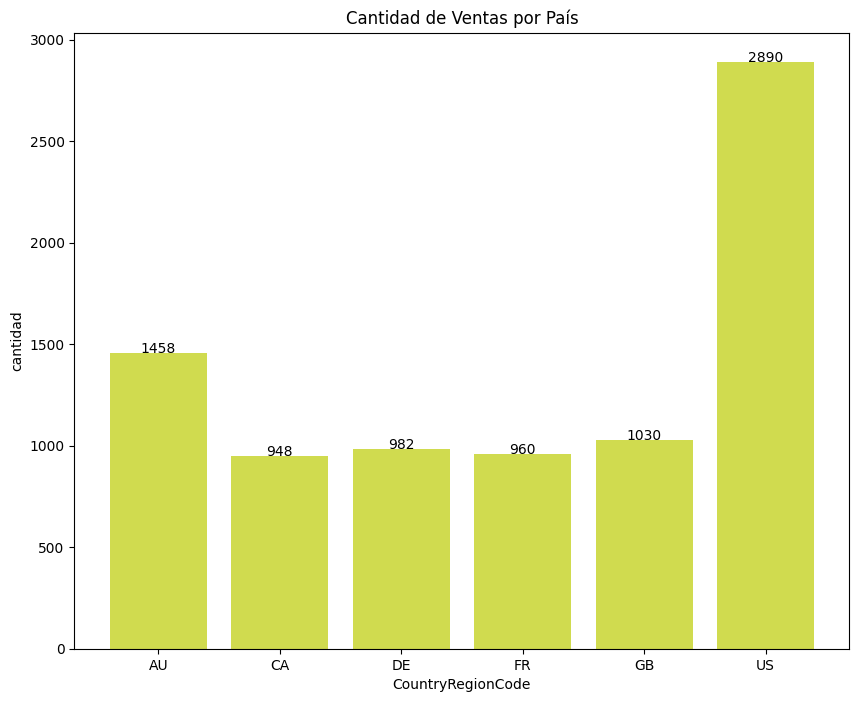

In [17]:
barplot_count(customersPurchases, 'CountryRegionCode', 'Cantidad de Ventas por País')

▶ Group Biv


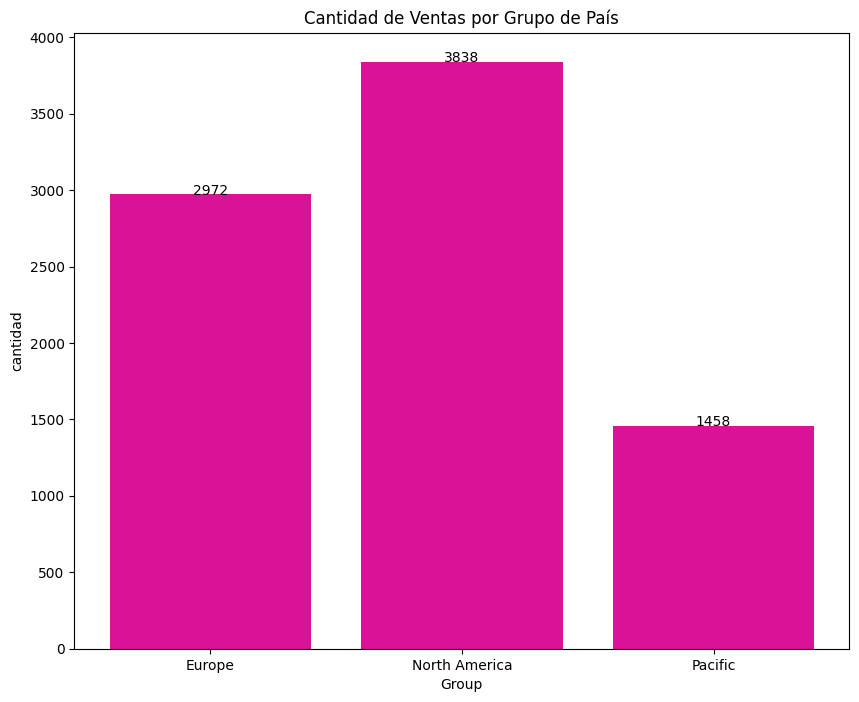

In [18]:
barplot_count(customersPurchases, 'Group', 'Cantidad de Ventas por Grupo de País')

In [19]:
cross_tab = pd.crosstab(index=customersPurchases['Group'],
                        columns=customersPurchases['BikePurchase'])
cross_tab

BikePurchase,0,1
Group,,
Europe,1567,1405
North America,2076,1762
Pacific,644,814


In [20]:
cross_tab_prop = pd.DataFrame(customersPurchases.groupby('Group')['Gender'].value_counts(normalize=True).unstack('Gender'))
cross_tab_prop

Gender,F,M
Group,,
Europe,0.499664,0.500336
North America,0.485409,0.514591
Pacific,0.493827,0.506173


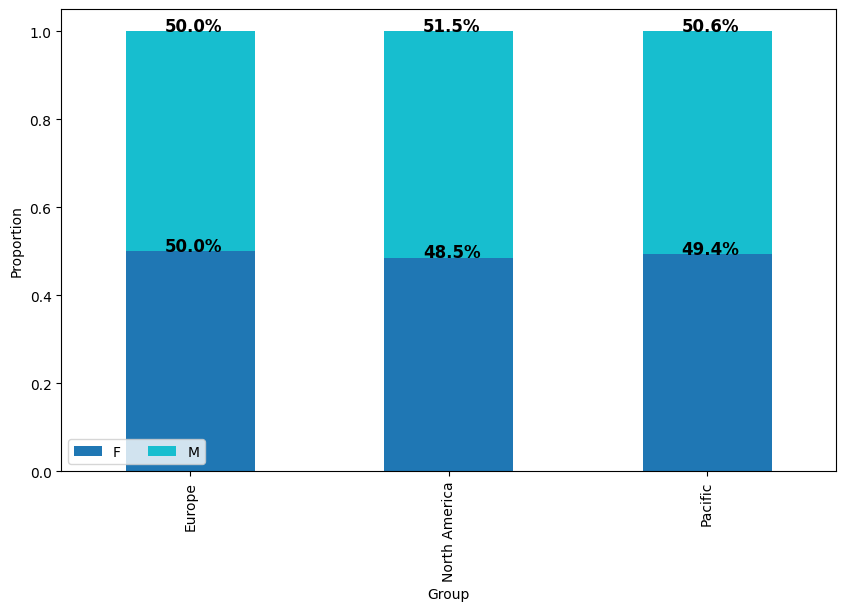

In [21]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Group")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.10,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

▶ Age Biv

In [22]:
import seaborn as sns
def boxplot(dataframe, X, titulo):
  #selecciona un color aleatoriamente entre la lista de colores acceptables para la funcción catplot
  paleta = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']
  sns.catplot(x=X, data=dataframe, kind="box", aspect=1.5, palette=paleta[random.randint(0, len(paleta))])
  
  #agrega título del plot, título de los ejes y guarda la figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  plt.show()

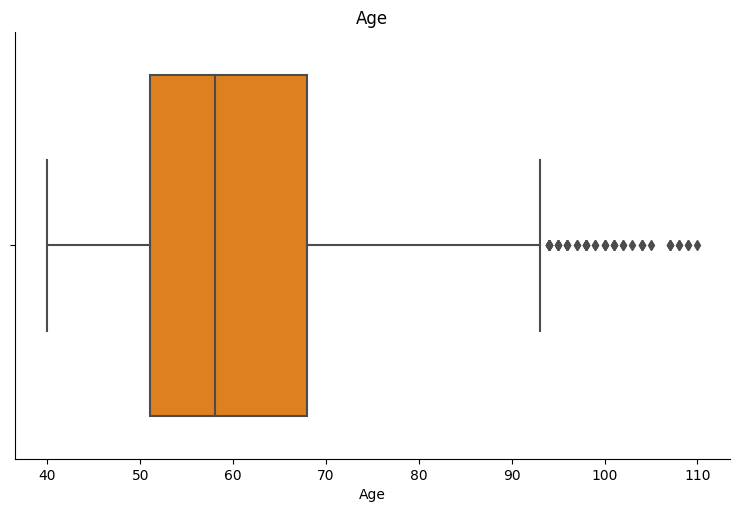

In [23]:
boxplot(customersPurchases, 'Age', 'Age')

▶ MaritalStatus

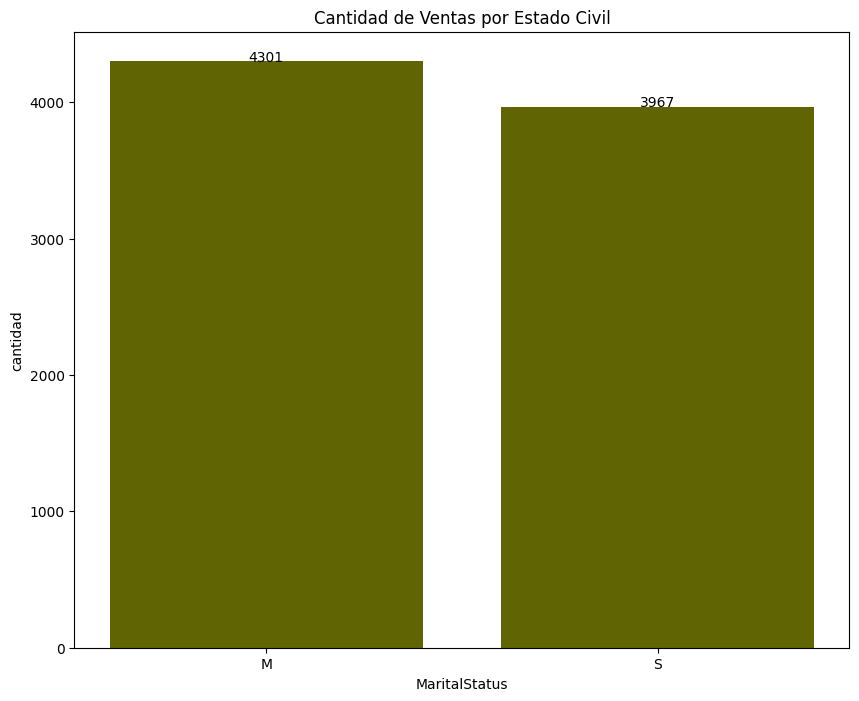

In [24]:
barplot_count(customersPurchases, 'MaritalStatus', 'Cantidad de Ventas por Estado Civil')

▶ YearlyIncome

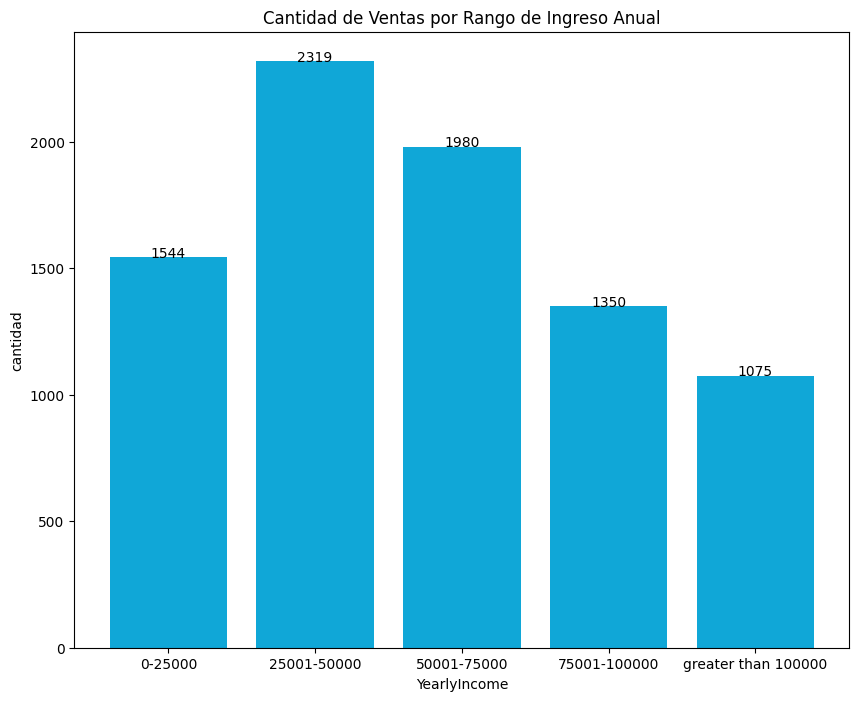

In [25]:
barplot_count(customersPurchases, 'YearlyIncome', 'Cantidad de Ventas por Rango de Ingreso Anual')

▶ Gender

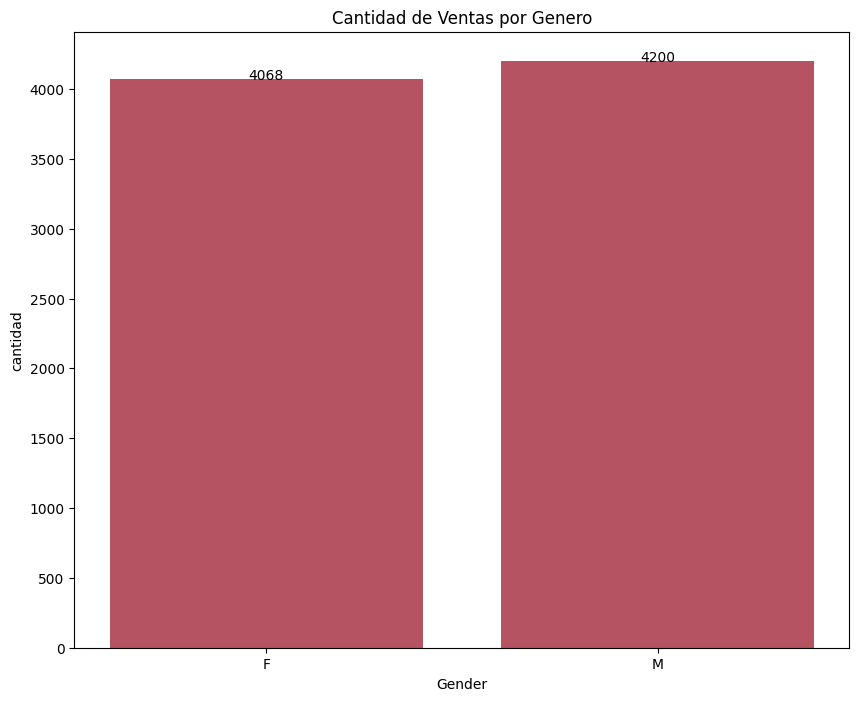

In [26]:
barplot_count(customersPurchases, 'Gender', 'Cantidad de Ventas por Genero')

▶ Education

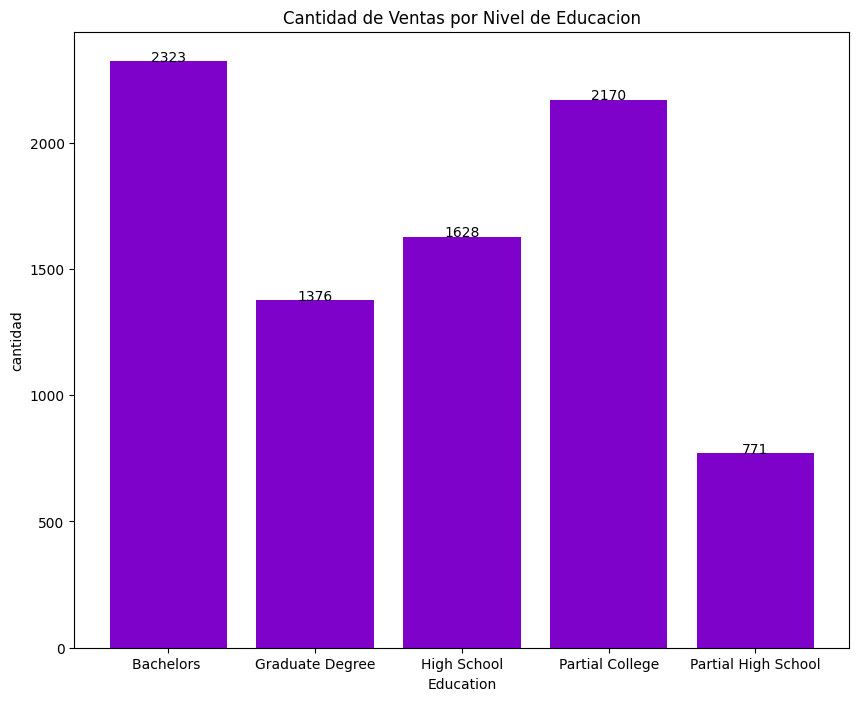

In [27]:
barplot_count(customersPurchases, 'Education', 'Cantidad de Ventas por Nivel de Educacion')

In [28]:
grupoo = pd.DataFrame(customersPurchases['Education'].value_counts())

grupoo

,Education
Bachelors,2323
Partial College,2170
High School,1628
Graduate Degree,1376
Partial High School,771


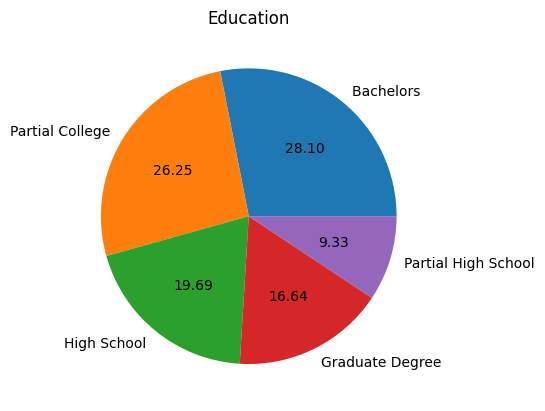

In [29]:
#to add percentages
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

#to add labels
def get_new_labels(sizes, labels):
    new_labels = [label for size, label in zip(sizes, labels)]
    return new_labels

sizes = grupoo['Education']
labels = grupoo.index
ax = grupoo.plot.pie(y = "Education", autopct=my_autopct, labels=get_new_labels(sizes, labels))
ax.get_legend().remove()
ax.set_ylabel('')
plt.title('Education')

plt.show()

In [30]:
new_educ = customersPurchases[(customersPurchases['Education'] == "High School") & (customersPurchases['TotalChildren'] == 5)]
new_educ


,BikePurchase,CountryRegionCode,Group,Age,MaritalStatus,YearlyIncome,Gender,TotalChildren,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
3,1,US,North America,74,S,25001-50000,F,5,High School,Professional,1,3
95,1,US,North America,74,M,25001-50000,M,5,High School,Professional,1,3
120,1,US,North America,74,M,25001-50000,M,5,High School,Professional,1,4
226,1,US,North America,74,S,25001-50000,M,5,High School,Professional,1,3
375,1,AU,Pacific,50,M,greater than 100000,M,5,High School,Management,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18040,0,AU,Pacific,76,M,0-25000,F,5,High School,Skilled Manual,1,4
18228,0,FR,Europe,75,M,50001-75000,M,5,High School,Professional,1,3
18308,0,FR,Europe,71,S,75001-100000,M,5,High School,Management,0,3
18362,0,US,North America,74,M,25001-50000,M,5,High School,Professional,1,3


▶ Occupation

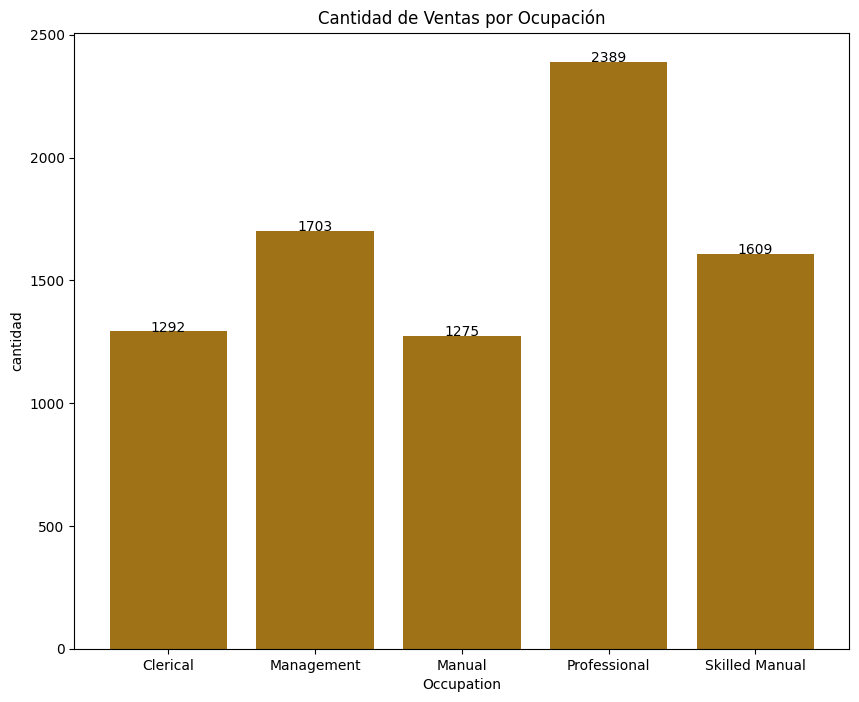

In [31]:
barplot_count(customersPurchases, 'Occupation', 'Cantidad de Ventas por Ocupación')


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Observando los gráficos presentados, es posible identificar que aproximadamente la mitad de los clientes de AdventureWorks se concentra en la **America del Norte** (la mayor parte en los **Estados Unidos**). Un 53% de los clientes son **casados**, 60% de los clientes tienen renta anual **entre 25001 y 75000**, poco más de la mitad de ellos son **hombres**, su nivel de estudios es principalmente **“Bachelors” y “Partial Colleges”** y su ocupación es sobre todo **“Profesional” y “Skilled Manual”**.*

```
Variables Numericas
```

- BikePurchase
- Age
- TotalChildren
- HomeOwnerFlag
- NumberCarsOwned



**Histogram function**

In [32]:
# función para creación del histograma

def histograma(dataframe, variable, titulo):
  plt.figure(figsize=((10,8)))

  # por una cuestión de visualización, el histograma fue utilizado para variables que poseen más de 100 valores distinctos, 
  # mientras que para las variables con hasta 100 valores fue utilizado un barplot simple, como lo utilizado anteriormente.
  
  if len(dataframe[variable].unique()) > 100:
    colors = f'{"%06x" % random.randint(0, 0xFFFFFF)}' #color aleatoria
    plt.hist(dataframe[variable], edgecolor='white', color = '#' + colors)
  else:
    df = dataframe.groupby(variable)[variable].count().reset_index(name='count')
    x = df[variable]
    y = df['count']
    colors = f'{"%06x" % random.randint(0, 0xFFFFFF)}' #color aleatoria
    bars = plt.bar(x,y, color = '#' + colors)

  
  #agrega título del plot, titulo de los ejes y guarda la figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  plt.show()


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Para comprender las variables numericas son presentados a seguir algunos histogramas, representando la distribución de los datos y, cuando necesario, análisis de estadistica descriptiva. La función utilizada incluye la atribución de colores aleatorios, para tornar las visualizaciones de datos más agradable y menos monótona.*

▶ BikePurchase


In [34]:
customersPurchases.BikePurchase.describe()

count    8268.000000
mean        0.481495
std         0.499688
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: BikePurchase, dtype: float64

In [35]:
customersPurchases.BikePurchase.value_counts()

0    4287
1    3981
Name: BikePurchase, dtype: int64

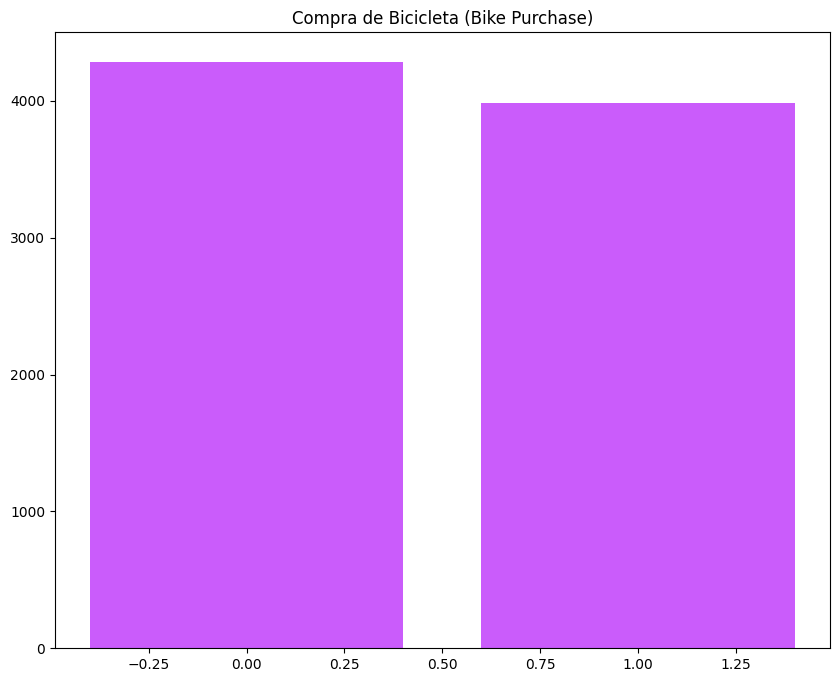

In [36]:
histograma(customersPurchases, "BikePurchase", "Compra de Bicicleta (Bike Purchase)")

▶ Age

In [37]:
customersPurchases.Age.describe()

count    8268.000000
mean       60.136309
std        11.994320
min        40.000000
25%        51.000000
50%        58.000000
75%        68.000000
max       110.000000
Name: Age, dtype: float64

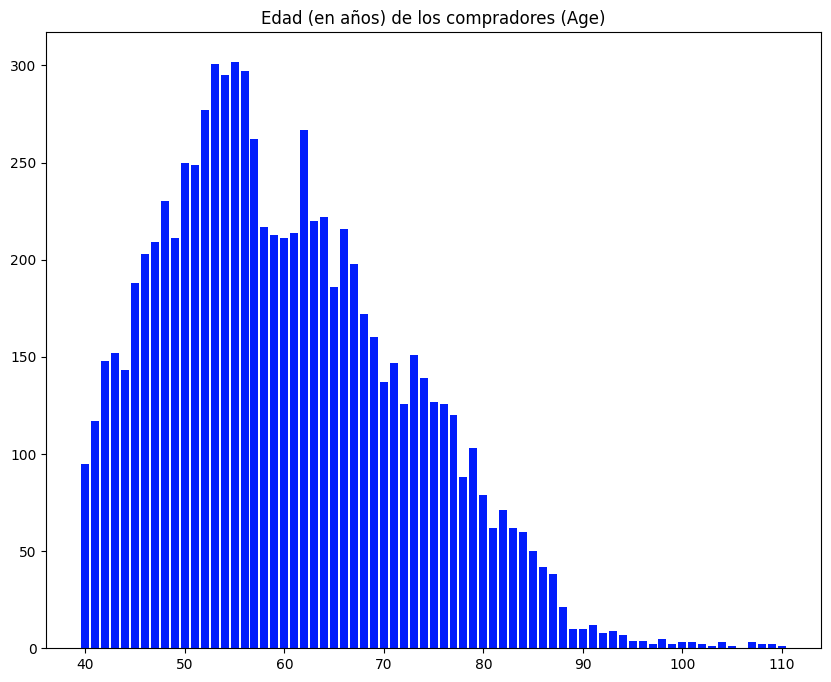

In [38]:
histograma(customersPurchases, "Age", "Edad (en años) de los compradores (Age)")

▶ TotalChildren

In [39]:
customersPurchases.TotalChildren.describe()

count    8268.000000
mean        2.043058
std         1.633561
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: TotalChildren, dtype: float64

In [40]:
customersPurchases.TotalChildren.value_counts()

0    2010
2    1787
1    1391
4    1183
3    1145
5     752
Name: TotalChildren, dtype: int64

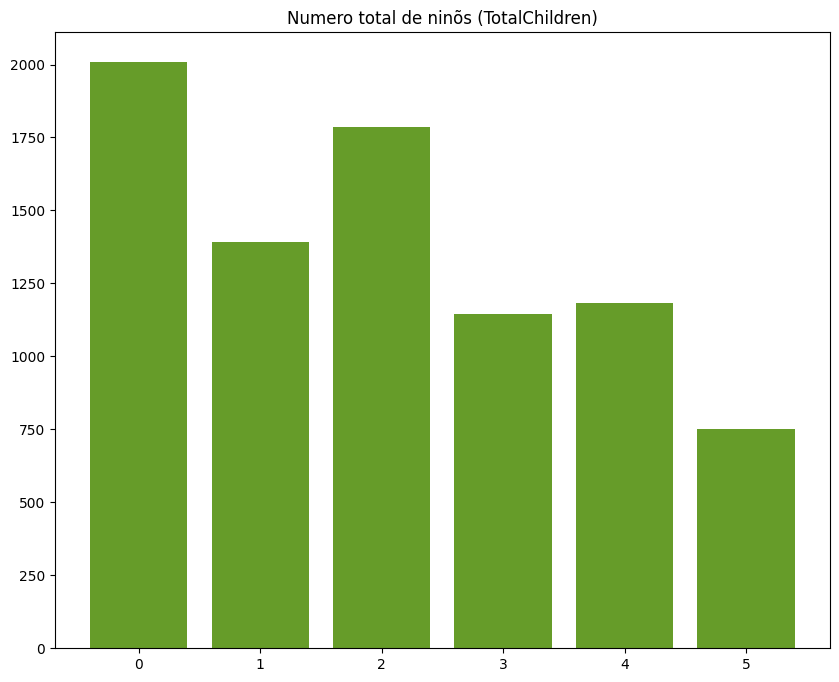

In [41]:
histograma(customersPurchases, "TotalChildren", "Numero total de ninõs (TotalChildren)")

▶ HomeOwnerFlag

In [42]:
customersPurchases.HomeOwnerFlag.describe()

count    8268.000000
mean        0.635462
std         0.481329
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HomeOwnerFlag, dtype: float64

In [43]:
customersPurchases.HomeOwnerFlag.value_counts()

1    5254
0    3014
Name: HomeOwnerFlag, dtype: int64

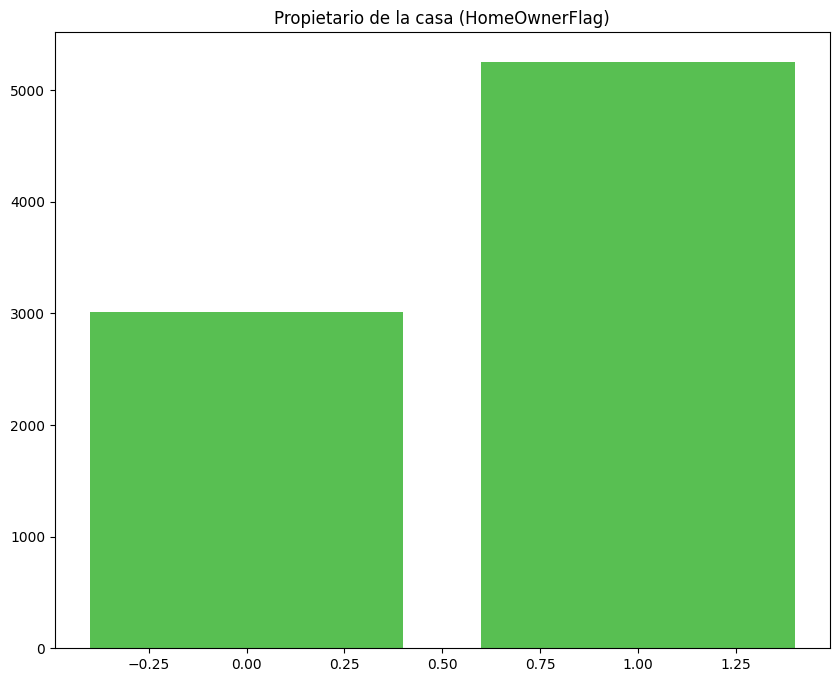

In [44]:
histograma(customersPurchases, "HomeOwnerFlag", "Propietario de la casa (HomeOwnerFlag)")

▶ NumberCarsOwned

In [45]:
customersPurchases.NumberCarsOwned.describe()

count    8268.000000
mean        1.624456
std         1.205354
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: NumberCarsOwned, dtype: float64

In [46]:
customersPurchases.NumberCarsOwned.value_counts()

2    2870
1    1946
0    1801
3     859
4     792
Name: NumberCarsOwned, dtype: int64

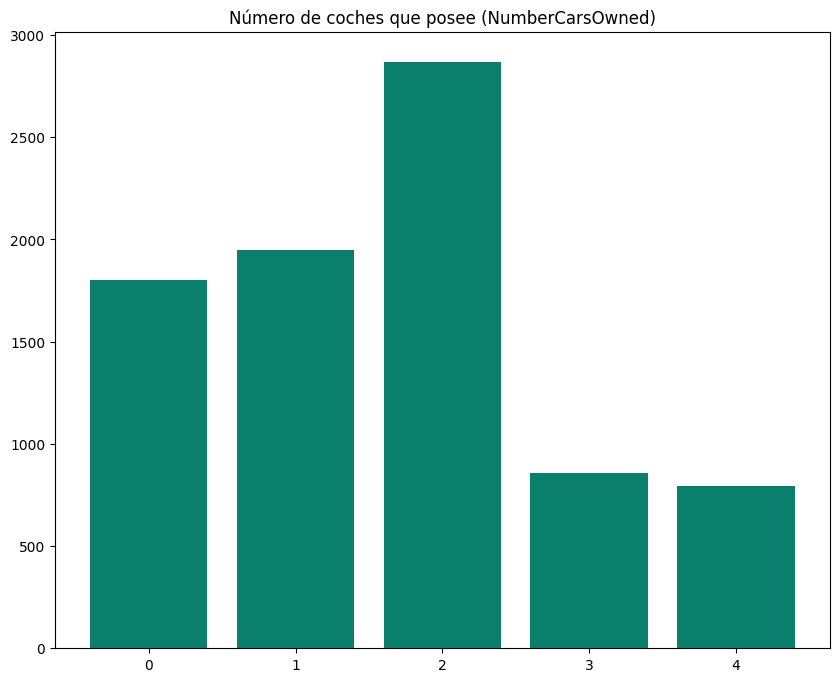

In [47]:
histograma(customersPurchases, "NumberCarsOwned", "Número de coches que posee (NumberCarsOwned)")


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *El **gasto total** promedio de los clientes es de **1601 euros** , sin embargo, 50% de ellos gasta hasta 325 anualmente. Hay una gran concentración de clientes que gastan hasta 2000. Más o menos la **mitad** de los clientes **compraron bicicleta**, lo que indica un equilibrio con relación a esa variable, lo que será muy útil para análisis posteriores de modelos de clasificación. Con relación a su edad, la **media** y la mediana de los clientes está **alrededor de 58 años**. Un 50% de los clientes tiene edad entre 50 y 66 años. El numero medio de **hijos** por clientes es **1,85**, con una mediana de 2. Aproximadamente 30% de los clientes no tiene ningún hijo. Más de **60%** de los clientes **son propietarios de la casa**, mientras que **77%** de los clientes **tiene por lo menos un coche** (en media 1,51 coche por persona).*

```
Relaciones entre las variables
```


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Por fin, para comprender como las variables numéricas se relacionan, fue inicialmente realizada un análisis de correlación, representada en un mapa de calor. A partir de la observación del resultado de la correlación , fueron construídos boxplot para la variable objeto del analisis (compran de bicicleta) y las variables que indicaron tener algun nivel de correlación con ella. Además, fue construido un boxplot para las variables "Age" y TotalChildren" que presentaron una moderada correlación* 

<ipython-input-48-e974ac2b0453>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customersPurchases.corr(),


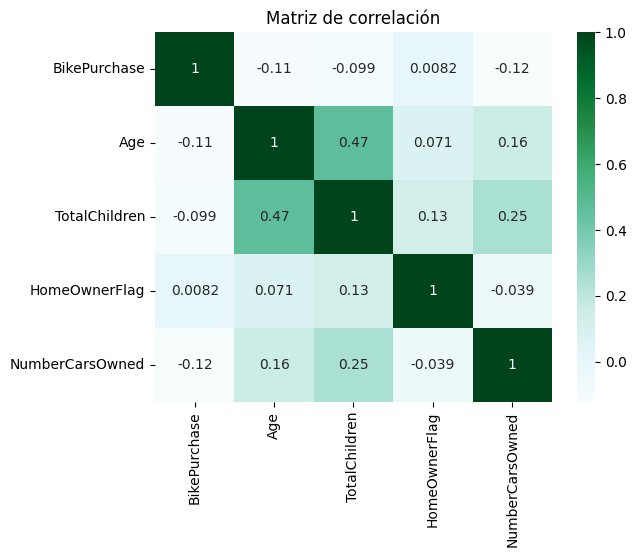

In [48]:
import seaborn as sns

#crea mapa de calor
sns.heatmap(customersPurchases.corr(), 
            cmap="BuGn", 
            annot=True)

#agrega título y guarda la figura
titulo = "Matriz de correlación"
plt.title(titulo)
plt.savefig(titulo + '.png', bbox_inches="tight")
plt.show()

**Boxplot function**

In [49]:
#crea la función para construcción del boxplot
def boxplot(dataframe, X, Y, titulo):
  #selecciona un color aleatoriamente entre la lista de colores acceptables para la funcción catplot
  paleta = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']
  sns.catplot(x=X, y=Y, data=dataframe, kind="box", aspect=1.5, palette=paleta[random.randint(0, len(paleta))])
  
  #agrega título del plot, título de los ejes y guarda la figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  plt.show()

▶ Compra de bicicletas x Edad de los compradores

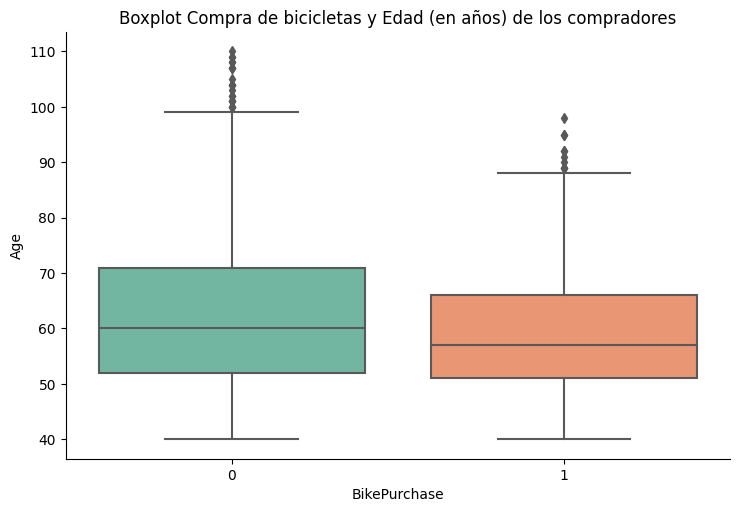

In [56]:
boxplot(customersPurchases, "BikePurchase", "Age", "Boxplot Compra de bicicletas y Edad (en años) de los compradores")

▶ Compra de bicicletas x Numero total de niños

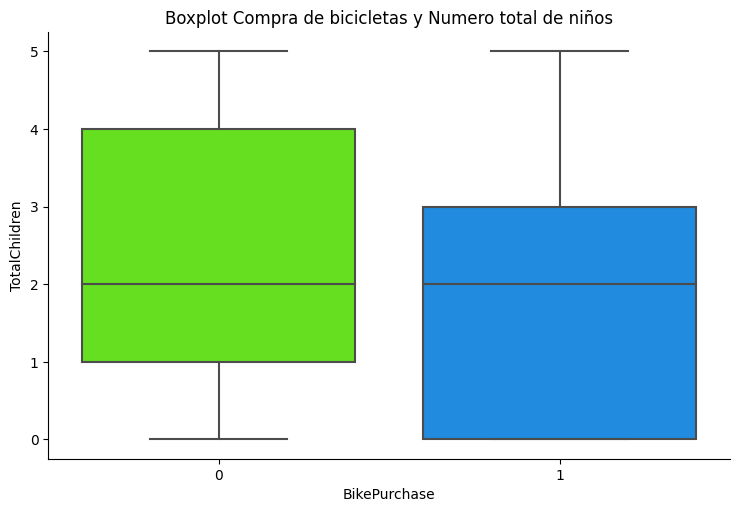

In [57]:
boxplot(customersPurchases, "BikePurchase", "TotalChildren", "Boxplot Compra de bicicletas y Numero total de niños")

▶ Compra de bicicletas x Numero de coches

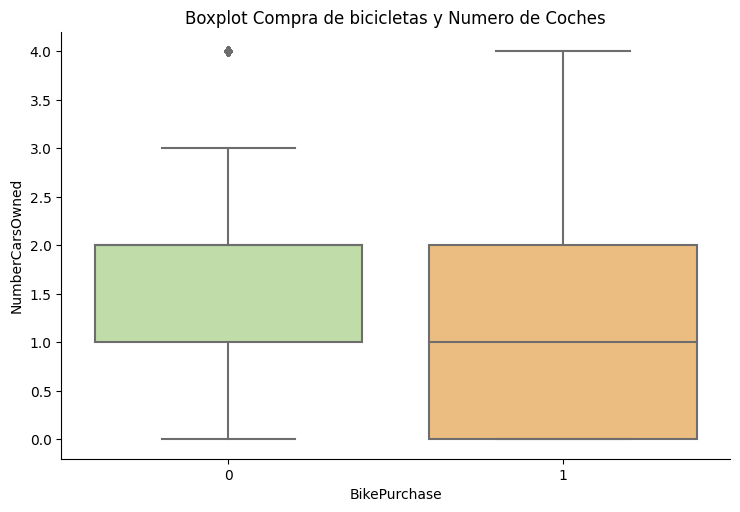

In [58]:
boxplot(customersPurchases, "BikePurchase", "NumberCarsOwned", "Boxplot Compra de bicicletas y Numero de Coches")

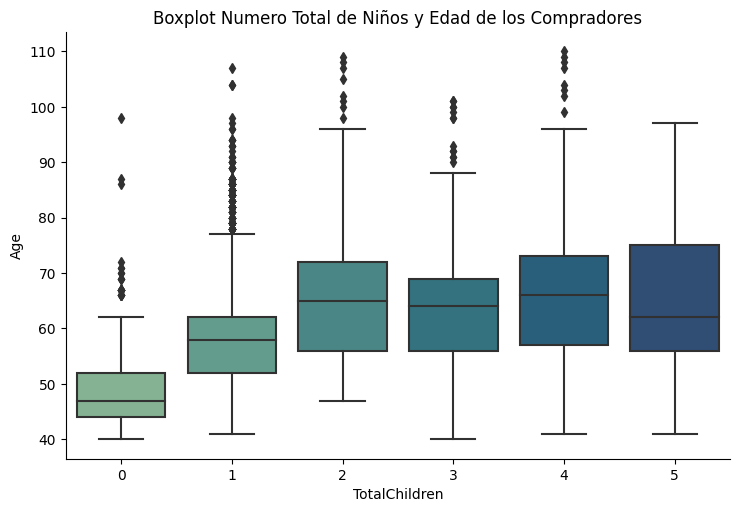

In [59]:
boxplot(customersPurchases, "TotalChildren", "Age", "Boxplot Numero Total de Niños y Edad de los Compradores")


<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> **Relación entre la variable Compra o no de Bicicleta y:** 

<font color='00BBF5'> *Gasto Total:*</font>  *entre los que no compraron bicicleta el gasto total es de menos de 1000 euros, con algunos outliers con gastos de máximo 2000 euros. Entre los que compraron bicicleta, la mediana es de aproximadamente 2000 euros con una dispersión mayor entre los que tuvieron gasto superior a ella. Hay también una cantidad considerables de clientes que tuvieron gastos mayores que el limite superior de cerca de 9000 euros, clasificados cómo outliers.*

<font color='00BBF5'> *Edad:*</font>  *con relación a la edad, la mediana entre los que compraron y los que no compraron bicicletas está muy próxima, aunque la edad de los que no compraron bicicleta presenta una mayor dispersión. Ambos los grupos poseen outliers.* 

<font color='00BBF5'> *Niños:*</font>  *la mediana de niños entre los que no compraron bicicleta es mayor que la misma medida para los que compraron. Mientras 75% de los clientes que compraron bicicleta tienen un máximo de 3 hijos, la misma cantidad entre los que no compraron bicicleta tienen hasta 4 hijos. *

<font color='00BBF5'> *Número de coches:*</font>  *entre los que no compraron bicicleta, hay una predominancia de clientes con entre 1 y 2 coches. Entre los que compraron bicicleta, hay una mayor dispersión, con un 50% de los clientes con entre 1 y 2 coches.* 



<font color='4A4A4A'> **Relación entre las variables Número de niños y Edad:**

*La mediana de edad entre los clientes sin niños es menor que todos los otros grupos. Clientes con 2 hijos tiene una mayor mediana de edad, mientras que clientes con 5 hijos poseen mayor dispersión de edad, a pesar de la mediana próxima a de los grupos que poseen 4 y 1 hijo.*